## Docs

### Frequency Tokenizer

In [1]:
import tkseem as tk

Read, preprocess then train

In [2]:
tokenizer = tk.WordTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()

Reading the data ...
Training WordTokenizer...


Tokenize 

In [3]:
tokenizer.tokenize("السلام عليكم")

['السلام', 'عليكم']

Encode as ids

In [4]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[557, 798]


Decode back to tokens

In [5]:
decoded = tokenizer.decode(encoded)
print(decoded)

['السلام', 'عليكم']


In [6]:
detokenized = tokenizer.detokenize(decoded)
print(detokenized)

السلام عليكم


### SentencePiece Tokenizer

Read, preprocess then train

In [7]:
tokenizer = tk.SentencePieceTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()

Reading the data ...
Training SentencePiece...


Tokenize 

In [8]:
tokenizer.tokenize("صباح الخير يا أصدقاء")

['▁صباح', '▁الخير', '▁يا', '▁أص', 'د', 'قاء']

Encode as ids

In [9]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[1799, 2741]


Decode back to tokens

In [10]:
decoded = tokenizer.decode(encoded)
print(decoded)

['▁السلام', '▁عليكم']


In [11]:
detokenized = tokenizer.detokenize(decoded)
print(detokenized)

 السلام عليكم


### Auto Tokenizer

Read, preprocess then train

In [12]:
tokenizer = tk.AutoTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()

Reading the data ...
Training AutoTokenizer...


Tokenize 

In [13]:
tokenizer.tokenize("السلام عليكم")

['ال', '##سلام', 'علي', '##كم']

Encode as ids

In [14]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[2, 367, 764, 184]


Decode back to tokens

In [15]:
decoded = tokenizer.decode(encoded)
print(decoded)

['ال', '##سلام', 'علي', '##كم']


### Random Tokenizer

In [16]:
tokenizer = tk.RandomTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()

Reading the data ...
Training RandomTokenizer ...


In [17]:
tokenizer.tokenize("السلام عليكم أيها الأصدقاء")

['السلا', '##م', 'علي', '##كم', 'أ', '##يها', 'ال', '##أصد', '##قاء']

### Disjoint Letter Tokenizer

In [18]:
tokenizer = tk.DisjointLetterTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()

Reading the data ...
Training DisjointLetterTokenizer ...


In [19]:
print(tokenizer.tokenize("السلام عليكم أيها الأصدقاء"))

['ا', '##لسلا', '##م', 'عليكم', 'أ', '##يها', 'ا', '##لأ', '##صد', '##قا', '##ء']


### Character Tokenizer

In [20]:
tokenizer = tk.CharacterTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()

Reading the data ...
Training CharacterTokenizer ...


In [21]:
tokenizer.tokenize("السلام عليكم")

['ا', '##ل', '##س', '##ل', '##ا', '##م', 'ع', '##ل', '##ي', '##ك', '##م']

### Large Files

We can use memory mapping to extract token's frequency for large files. It uses `mmap` to process chunks of the data at each iteration step. 

In [22]:
# initialize
tokenizer = tk.WordTokenizer()
tokenizer.process_data('data.txt')

# training 
tokenizer.train(large_file = True)

0it [00:00, ?it/s]

Reading the data ...
Training WordTokenizer...


1it [00:00,  2.79it/s]


### Tokenization vs Segmentation 

We can use tokenization to segment words using a pretrained dictionary. This makes segmentation very fast as compared to
using libraries like `farasa`.

In [23]:
import time

tokenizer = tk.AutoTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()

start_time = time.time()
out = tokenizer.tokenize(open('data/raw/train.txt').read(), cache = True)
end_time = time.time()
print(end_time - start_time)

Reading the data ...
Training AutoTokenizer...
37.64352488517761


In [24]:
tokenizer = tk.WordTokenizer(segment = True)
start_time = time.time()
tokenizer.process_data('data.txt')
end_time = time.time()
print(end_time - start_time)

Initializing Farasa


/home/zaid/.local/lib/python3.8/site-packages/farasa/__base.py:43: UserWarning: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.
  warnings.warn(


Reading the data ...
Segmenting the data ...
50.82935118675232


### Export Models

Models can be saved for deployment and reloading.

In [25]:
tokenizer = tk.WordTokenizer()
tokenizer.process_data('data.txt')
tokenizer.train()
tokenizer.save_model('freq.pl')

Reading the data ...
Training WordTokenizer...
Saving as pickle file ...


load model without pretraining

In [26]:
tokenizer = tk.WordTokenizer()
tokenizer.load_model('freq.pl')

Loading as pickle file ...


In [27]:
tokenizer.tokenize('السلام عليكم')

['السلام', 'عليكم']

### Benchmarking

In [28]:
import seaborn as sns
import pandas as pd

def calc_time(fun):
    start_time = time.time()
    fun().train()
    return time.time() - start_time

running_times = {}

running_times['Word'] = calc_time(tk.WordTokenizer)
running_times['SP'] = calc_time(tk.SentencePieceTokenizer)
running_times['Random'] = calc_time(tk.RandomTokenizer)
running_times['Auto'] = calc_time(tk.AutoTokenizer)
running_times['Disjoint'] = calc_time(tk.DisjointLetterTokenizer)
running_times['Character'] = calc_time(tk.CharacterTokenizer)

Training WordTokenizer...
Training SentencePiece...
Training RandomTokenizer ...
Training AutoTokenizer...
Training DisjointLetterTokenizer ...
Training CharacterTokenizer ...


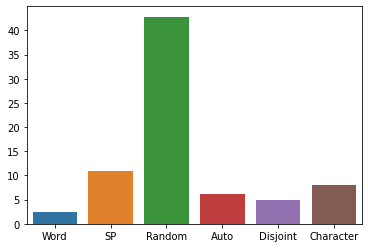

In [29]:
sns.barplot(data = pd.DataFrame.from_dict([running_times]))